## Carga del dataset Diamonds
En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el paquete "ggplot2" con nombre "diamonds"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import seaborn as sns 

In [2]:
diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2")
data = diamonds.data
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Estudio de los tipos de las columnas

In [3]:
print (type(data))
print ("carat", data["carat"].dtype)
print ("cut", data["cut"].dtype)
print ("color", data["color"].dtype)
print ("clarity", data["clarity"].dtype)
print ("depth", data["depth"].dtype)
print ("table", data["table"].dtype)
print ("price", data["price"].dtype)

<class 'pandas.core.frame.DataFrame'>
('carat', dtype('float64'))
('cut', dtype('O'))
('color', dtype('O'))
('clarity', dtype('O'))
('depth', dtype('float64'))
('table', dtype('float64'))
('price', dtype('int64'))


## Cálculo de los valores máximo, mínimo y medio de la variable carat

In [4]:
print "El valor medio de Carat es", np.mean(data.carat)
print "El valo máximo de Carat es", np.max(data.carat)
print "Elvalor mínimo de Carat", np.min(data.carat)

El valor medio de Carat es 0.797939747868
El valo máximo de Carat es 5.01
Elvalor mínimo de Carat 0.2


## Dibujo del histograma Carat vs Distribución Gamma

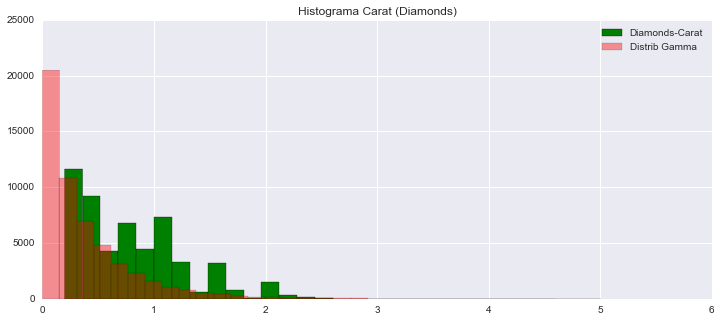

In [5]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
fig.add_subplot(111)

dist_gamma = np.random.gamma(np.mean(data.carat), np.std(data.carat), data.carat.size)

plt.hist(data.carat, bins=30, histtype='bar',  color='g', label='Diamonds-Carat')
plt.hist(dist_gamma, bins=30, histtype='bar',  color='r', alpha=0.4, label='Distrib Gamma')
plt.title("Histograma Carat (Diamonds)")
plt.legend()
plt.show()

## Nube de puntos de Carat vs Precio
Ejes en escala logarítmica

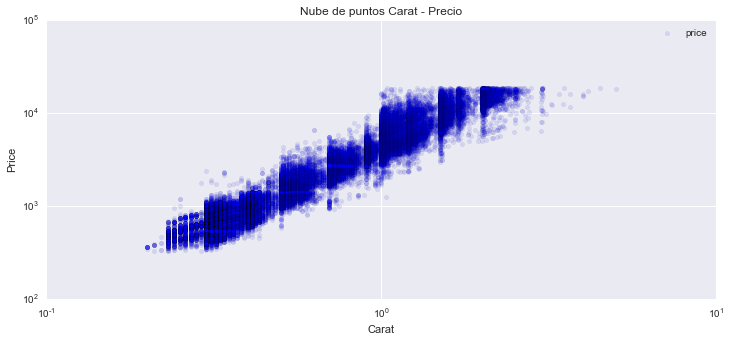

In [6]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')
 
plt.scatter(data.carat, data.price, alpha=0.1)
plt.title("Nube de puntos Carat - Precio")

plt.legend()
plt.show()

## Nube de puntos de Carat vs Precio (Color = E y Claridad = SI1)
Ejes en escala logarítmica

In [7]:
data_filtered = data[(data.color=='E') &(data.clarity=='SI1')]

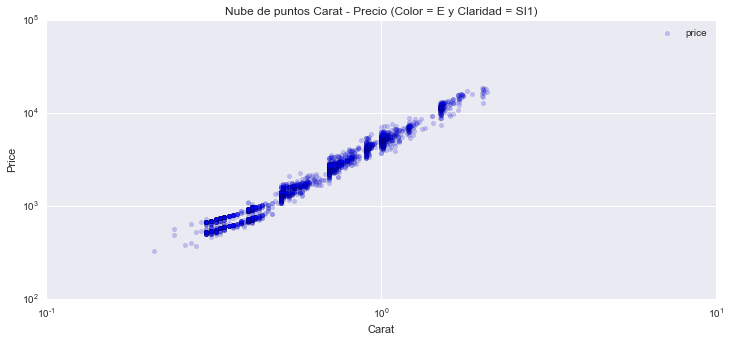

In [8]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(data_filtered.carat, data_filtered.price, alpha=0.2)
plt.title("Nube de puntos Carat - Precio (Color = E y Claridad = SI1)")

plt.legend()
plt.show()

## Relación entre volumen y precio
Ejes en escala logarítmica

In [9]:
data['volumen'] = data.x*data.y*data.z

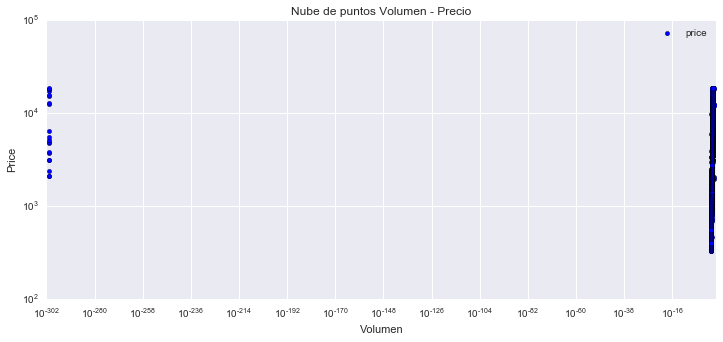

In [10]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Volumen")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')
 
plt.scatter(data.volumen, data.price)
plt.title("Nube de puntos Volumen - Precio")

plt.legend()
plt.show()

En el gráfico puede observarse que existen, tras las transformación logarítmica, outliers que toman valores muy cercanos a cero.

In [11]:
data_filtered_v = data[data['volumen'] > 0]
print(data.shape)
print(data_filtered_v.shape)

(53940, 11)
(53920, 11)


Se eliminan 20 observaciones, mediante la condición de que el valor de carat sea estrictamente mayor que cero.

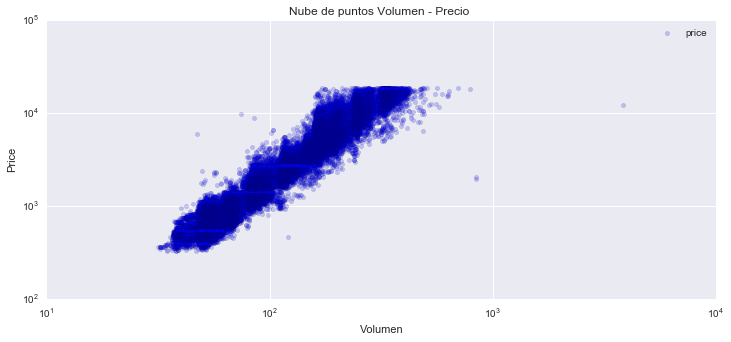

In [12]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Volumen")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')

 
plt.scatter(data_filtered_v.volumen, data_filtered_v.price, alpha=0.2)
plt.title("Nube de puntos Volumen - Precio ")

plt.legend()
plt.show()

Del gráfico de dispersión parece apreciarse una depencia funcional de tipo lineal entre el volumen y el precio, una vez eliminados los outliers. 

## Comprobación de existencia de relación lineal entre precio y volumen, mediante la aplicación del modelo de regresión lineal
Utlización de las primeras 1000 observaciones.
Voy atulizar todas las observaciones.Para la utilización de las 1000 primeras observaciones tan solo, se tendría que intoducir un filtro.

In [13]:
result = sm.OLS(data.price, data.volumen).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.624e+05
Date:                Thu, 21 Jul 2016   Prob (F-statistic):               0.00
Time:                        21:17:02   Log-Likelihood:            -4.8697e+05
No. Observations:               53940   AIC:                         9.739e+05
Df Residuals:                   53939   BIC:                         9.739e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
volumen       34.4754      0.057    602.002      0.000        34.363    34.588
==============================================================================
Omnibus:                    43146.129   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        169253009.762
Skew:                          -2.269   Prob(JB):                         0.00
Kurtosis:                     277.384   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De la aplicación del modelo OLS se obtiene un R cuadrado muy alto, 0.87.

El p-value nos indica que el coeficiente es significativo con un nivel de significación <0.01.

No obstante, de los resultados podemos observar que algunos de los supuestos para la correcta aplicación de OLS, no se cumplen. Por ejemplo,  el test de Durbin-Watson está indicando existencia de autocorrelación (ya que el  valor no se encuentra cercano a 2), y la Prob(Omnibus) al tomar un valor muy pequeño, apunta a la no normalidad de los residuos. 

Esto se ve con mayor claridad, mediante una exploración gráfica de los residuos. No parece cumplirse el supuesto de aleatoriedad de los residuos.

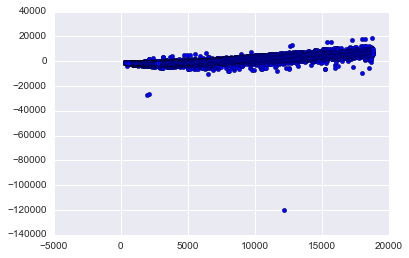

In [14]:
%matplotlib inline

plt.scatter(data.price, result.resid)

Eliminando valores extremos, se sigue apreciando la no aleatoridad.

(-1000, 20000)

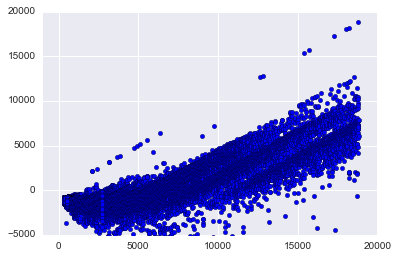

In [15]:
%matplotlib inline

plt.scatter(data.price, result.resid)
plt.ylim((-5000,20000))
plt.xlim((-1000,20000))

## Utlización Seaborn: nube de puntos precio vs carat

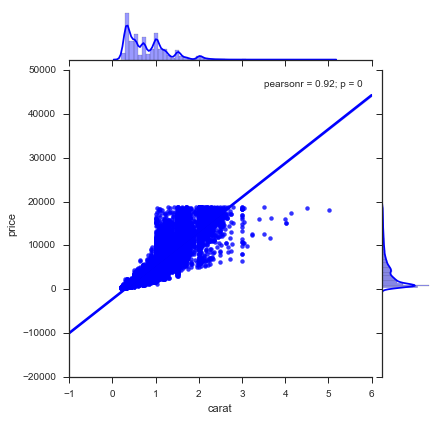

In [16]:
sns.set(style="ticks")
sns.jointplot(data.carat, data.price, kind="reg", color="blue")

## Identificación con un comando los diferentes tipos de corte (cut)

In [17]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

## Comprobación de la existencia de diferencias significativas en la media del precio para los cuts "Ideal" y "Premium" y el resto de cuts

Antes de realizar el análisis, se va a proceder a hacer análisis descriptivo. Se creará una nueva variable cut_label que agrupe el data frame en tres nuevas categorías de carat: Ideal, Premium y Resto. 
De los boxplot se puede apreciar que la distribución de la variable precio, para los distintos tipos de cut no es normal.

In [18]:
groupby_cut = data.groupby('cut')
for cut, value in groupby_cut['price']: print((cut, value.mean()))   

('Fair', 4358.757763975155)
('Good', 3928.864451691806)
('Ideal', 3457.541970210199)
('Premium', 4584.2577042999055)
('Very Good', 3981.7598907465654)


In [19]:
def cut_two (row):
    if row['cut'] == "Premium" :
      return 'Premium'
    if row['cut'] == "Ideal":
      return 'Ideal'
    return 'Resto'

In [20]:
data['cut_label'] = data.apply (lambda row: cut_two (row),axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen,cut_label
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,Ideal
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,Premium
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,Resto
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,Premium
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,Resto


/Users/Ainhoa/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/tools/plotting.py:3079: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


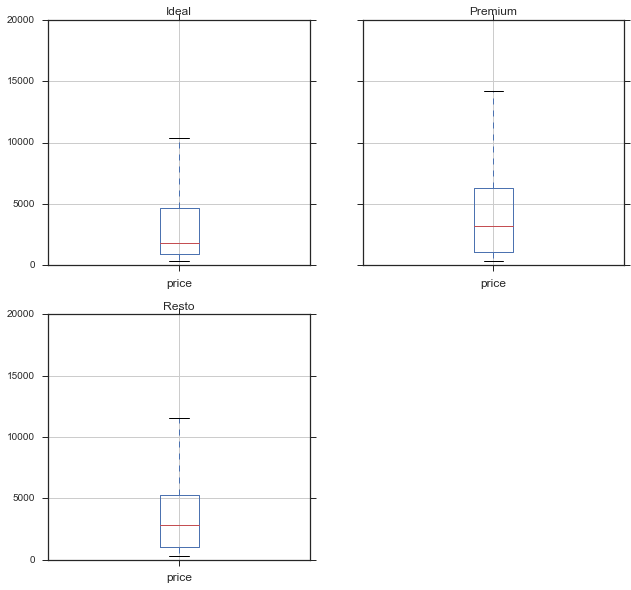

In [21]:
groupby_cut_label = data.groupby('cut_label')
groupby_cut_label.boxplot(column=['price'], figsize=(10, 10))
plt.show()

A continuación, se va proceder a realizar el muestreo para los tres distintos grupos: ideal, premium y el resto (Very Good, Good y Fair)

In [22]:
import random
from scipy import stats

ideal = data[data.cut == 'Ideal']
rows_ideal  = random.sample(list(ideal.index),1000)
sample_ideal = ideal.ix[rows_ideal]

premium = data[data.cut == 'Premium']
rows_premium  = random.sample(list(premium.index),1000)
sample_premium = premium.ix[rows_premium]

resto=data[(data.cut!='Ideal')&(data.cut!='Premium')]
rows_resto  = random.sample(list(resto.index),1000)
sample_resto = resto.ix[rows_resto]

Se comprueba a continuación, si existen diferencias significativas en las medias de los tres grupos: Ideal, Premium y Resto. Para ello se utilizará un contraste no paramétrico, ya que no se asume normalidad. Se utilizará el test de Wilcoxon, ya que se dispone de muestras de gran tamaño. Se plantea como hipótesis nula (H0) que las muestras provienen de la misma población. 

In [23]:
stats.wilcoxon(x=sample_ideal.price, y=sample_resto.price, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=217317.5, pvalue=0.00031230770787311787)

Aplicando el Wilcoxon Test a las muestras provenientes de Ideal y de Resto, rechazamos la hipótesis nula, ya que el p-value es menor que 0.05. No podemos afirmar que las muestras provengan de la misma población.

In [24]:
stats.wilcoxon(x=sample_premium.price, y=sample_resto.price, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=223146.0, pvalue=0.003008486313911333)

Aplicando el Wilcoxon Test a las muestras provenientes de Premium y de Resto, no podemos rechazar la hipótesis nula, es decir no podemos rechazar que las muestras provengan de la misma población.

## Obtención de la mediana del precio para cada valor de la claridad (clarity) y ordenación de  los resultados de manera descendente.

In [25]:
print(data[['clarity','price']].groupby(['clarity']).median().sort_values(by='price',ascending=False))

         price
clarity       
SI2       4072
I1        3344
SI1       2822
VS2       2054
VS1       2005
VVS2      1311
VVS1      1093
IF        1080
